<h1> Inicjalizacja </h1> 

In [33]:
import math 
stacja = ''
import csv
import matplotlib.pyplot as plt
data = []
ZTD = []
mean_ztd = []
def wybierz_stacje(nazwa):
    return nazwa
def interpoluj(p_i, t_i, h, h_i, fi):
    gamma = 0.0065
    R = 8.31432
    M = 0.289644
    g = 9.8063*(1-(10**-7)*((h_i+h)/2)*(1-0.0026373*math.cos(2*fi)+5.9*(10**-6)*(math.cos(2*fi)**2)))
    p = p_i * ((t_i - gamma*(h-h_i))/t_i)**((g*M)/(R*gamma))

    return str(p)
    

<h1> Zdefiniowanie funkcji obliczajacej paramter ZTD </h1>

In [34]:
def oblicz_ztd(nazwa):
    ZTD = []
    with open(nazwa, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                if row[2] == stacja:
                    if (row[3]=='2m'):
                        row[12] = interpoluj(float(row[12]), float(row[10]), float(row[8]), float(row[9]), float(row[4]))
                    data.append(row)
                    e_sat = 6.112*math.exp((17.67*(float(row[10])-273.15))/((float(row[10])-273.15)+243.5))
                    e = float(row[11])*e_sat/100
                    #print(e)
                    va = 0.002277*(float(row[12])+((1255/float(row[10]))+0.05)*e)
                    ZTD.append(va)
            return ZTD
                    

In [35]:
stacja = wybierz_stacje("BART")

<h1> Wczytanie z plików </h1>

In [36]:
z1 = oblicz_ztd('dane/surface_20150912_00.csv')
z2 = oblicz_ztd('dane/surface_20150912_06.csv')
z3 = oblicz_ztd('dane/surface_20150912_12.csv')
z4 = oblicz_ztd('dane/surface_20150912_18.csv')
z5 = oblicz_ztd('dane/surface_20150913_00.csv')
z6 = oblicz_ztd('dane/surface_20150913_06.csv')
z7 = oblicz_ztd('dane/surface_20150913_12.csv')
z8 = oblicz_ztd('dane/surface_20150913_18.csv')

<h1> Dokonywanie obliczen i zapisanie do pliku</h1>

In [37]:
mean_ztd = []
for i in range(0,6):
    mean_ztd.append(z1[i])
for i in range(0,6):
    mean_ztd.append((z1[i+6]*(1/(i+8))+z2[i]*(1/(i+2)))/((1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append((z1[i+12]*(1/(i+14))+z2[i+6]*(1/(i+8))+z3[i]*(1/(i+2)))/((1/(i+14))+(1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append((z1[i+18]*(1/(i+20))+z2[i+12]*(1/(i+14))+z3[i+6]*(1/(i+8))+z4[i]*(1/(i+2)))/((1/(i+20))+(1/(i+14))+(1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append((z2[i+18]*(1/(i+20))+z3[i+12]*(1/(i+14))+z4[i+6]*(1/(i+8))+z5[i]*(1/(i+2)))/((1/(i+20))+(1/(i+14))+(1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append((z3[i+18]*(1/(i+20))+z4[i+12]*(1/(i+14))+z5[i+6]*(1/(i+8))+z6[i]*(1/(i+2)))/((1/(i+20))+(1/(i+14))+(1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append((z4[i+18]*(1/(i+20))+z5[i+12]*(1/(i+14))+z6[i+6]*(1/(i+8))+z7[i]*(1/(i+2)))/((1/(i+20))+(1/(i+14))+(1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append((z5[i+18]*(1/(i+20))+z6[i+12]*(1/(i+14))+z7[i+6]*(1/(i+8))+z8[i]*(1/(i+2)))/((1/(i+20))+(1/(i+14))+(1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append((z6[i+18]*(1/(i+14))+z7[i+12]*(1/(i+8))+z8[i+6]*(1/(i+2)))/((1/(i+14))+(1/(i+8))+(1/(i+2))))    
for i in range(0,6):
    mean_ztd.append((z7[i+18]*(1/(i+8))+z8[i+12]*(1/(i+2)))/((1/(i+8))+(1/(i+2))))
for i in range(0,6):
    mean_ztd.append(z8[i+18])    

plik = open('values_ZTD', 'w')
plik.writelines(str(mean_ztd))
plik.close()



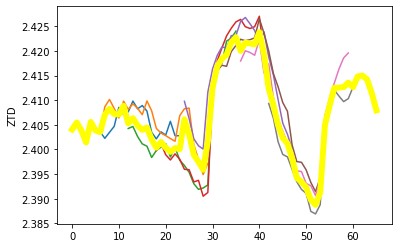

In [38]:
x1 = range(0,24)
x2 = range(6,30)
x3 = range(12,36)
x4 = range(18,42)
x5 = range(24,48)
x6 = range(30,54)
x7 = range(36,60)
x8 = range(42,66)
plt.plot(x1,z1)
plt.plot(x2,z2)
plt.plot(x3,z3)
plt.plot(x4,z4)
plt.plot(x5,z5)
plt.plot(x6,z6)
plt.plot(x7,z7)
plt.plot(x8,z8)
plt.plot(mean_ztd, linewidth=6.0,color='yellow')
plt.ylabel('ZTD')
plt.show()